# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [2]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [3]:
# Load the provided .csv file with the used car data

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
from numpy import genfromtxt
my_data = genfromtxt("data/km_year_power_price.csv", delimiter=',')
my_data

for line in lines:
    print(line)

['km', 'year', 'powerPS', 'avgPrice']
['125000', '2001', '40', '1371.11']
['150000', '2001', '40', '1298.70']
['5000', '2001', '60', '1232.43']
['50000', '2001', '60', '1733.89']
['60000', '2001', '60', '1985.24']
['70000', '2001', '60', '2100.86']
['80000', '2001', '60', '1473.93']
['90000', '2001', '60', '1542.09']
['100000', '2001', '60', '1399.41']
['125000', '2001', '60', '1365.02']
['150000', '2001', '60', '1158.64']
['5000', '2001', '80', '1441.33']
['30000', '2001', '80', '2717.71']
['50000', '2001', '80', '2732.83']
['70000', '2001', '80', '2265.15']
['80000', '2001', '80', '2141.35']
['90000', '2001', '80', '2379.50']
['100000', '2001', '80', '1934.69']
['125000', '2001', '80', '1838.33']
['150000', '2001', '80', '1517.53']
['5000', '2001', '100', '2103.80']
['30000', '2001', '100', '2186.36']
['60000', '2001', '100', '3352.86']
['70000', '2001', '100', '3272.65']
['80000', '2001', '100', '2928.75']
['90000', '2001', '100', '2481.43']
['100000', '2001', '100', '2814.53']
['12

Use a linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [14]:
# linear regression with linregress (estimate price from year)

# your code.....
year = my_data[1:, 1]
price = my_data[1:, 3]

slope, intercept, r_value_year, p_value, std_err = stats.linregress(year, price)
print(slope)
print(intercept)
print(r_value_year)

1509.0938253352235
-3018309.484956963
0.6767043169095447


In [15]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)

# your code.....
import math

year_ = year.reshape(-1, 1)
price_ = price.reshape(-1, 1)
reg = linear_model.LinearRegression().fit(year_, price_)

print(reg.coef_)
print(reg.intercept_)
r2 = reg.score(year_, price_)
math.sqrt(r2)

[[1509.09382534]]
[-3018309.48495696]


0.6767043169095441

In [16]:
# linear regression with least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....
N = len(year)
m = (N*sum(year*price) - sum(year)*sum(price)) / (N*sum(year**2) - sum(year)**2)
q = (sum(price) - m*sum(year))/N
print(m, q)

1509.093825337506 -3018309.4849615465


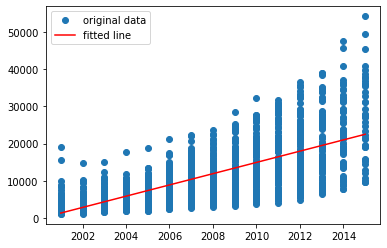

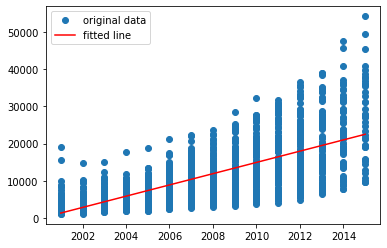

In [12]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code....
%matplotlib inline

plt.plot(year, price, 'o', label='original data')
plt.plot(year, intercept + slope*year, 'r', label='fitted line')
plt.legend()
plt.show()

plt.plot(year, price, 'o', label='original data')
plt.plot(year, q + m*year, 'r', label='fitted line')
plt.legend()
plt.show()

In [17]:
# linear regression with linregress (estimate price from power)

# your code.....
power = my_data[1:, 2]

slope, intercept, r_value_power, p_value, std_err = stats.linregress(power, price)
print(slope)
print(intercept)
print(r_value_power)

90.33080718820236
-1303.9126989880006
0.708550031526397


In [18]:
# linear regression with linregress (estimate price from km)

# your code...
km = my_data[1:, 0]

slope, intercept, r_value_km, p_value, std_err = stats.linregress(km, price)
print(slope)
print(intercept)
print(r_value_km)

-0.05425151330972561
16692.345302519734
-0.2572867429988496


In [19]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# your code......
print(r_value_year)
print(r_value_power) #power works better
print(r_value_km)

0.6767043169095447
0.708550031526397
-0.2572867429988496


In [26]:
# Optional : 2D linear regression with linear model (estimate price from year and power)

# your code......
x = my_data[1:, 1:3]

reg = linear_model.LinearRegression().fit(x, price_)

print(reg.coef_)
print(reg.intercept_)

[1325.2284004    80.43004469]
-2661196.7867490062
